In [1]:
import pandas as pd

# Load the dataset
file_path = 'Spotify_dataset_final_cleaned_and_normalized.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and some basic information
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               2000 non-null   int64  
 1   Song Name           2000 non-null   object 
 2   Artist              2000 non-null   object 
 3   Genre               2000 non-null   object 
 4   Popularity          2000 non-null   float64
 5   Danceability        2000 non-null   float64
 6   Energy              2000 non-null   float64
 7   Loudness            2000 non-null   float64
 8   Speechiness         2000 non-null   float64
 9   Acousticness        2000 non-null   float64
 10  Liveness            2000 non-null   float64
 11  Tempo               2000 non-null   float64
 12  Valence             2000 non-null   float64
 13  Release Year        2000 non-null   int64  
 14  Duration (minutes)  2000 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 234.5

(None,
    Index                          Song Name           Artist       Genre  \
 0      1                             Demons  Imagine Dragons        Rock   
 1      2           What Makes You Beautiful    One Direction         Pop   
 2      3              Wild Ones (feat. Sia)         Flo Rida     Hip Hop   
 3      4  Silhouettes - Original Radio Edit           Avicii  Electronic   
 4      5              The One That Got Away       Katy Perry         Pop   
 
    Popularity  Danceability  Energy  Loudness  Speechiness  Acousticness  \
 0        91.0          41.0    70.0      90.0          2.0          20.0   
 1        92.0          70.0    79.0      93.0         10.0           1.0   
 2        87.0          55.0    87.0      78.0          6.0          10.0   
 3        60.0          54.0    80.0      74.0          6.0          16.0   
 4        81.0          65.0    79.0      85.0          2.0           0.0   
 
    Liveness    Tempo  Valence  Release Year  Duration (minutes) 

# Histograms for the numerical features

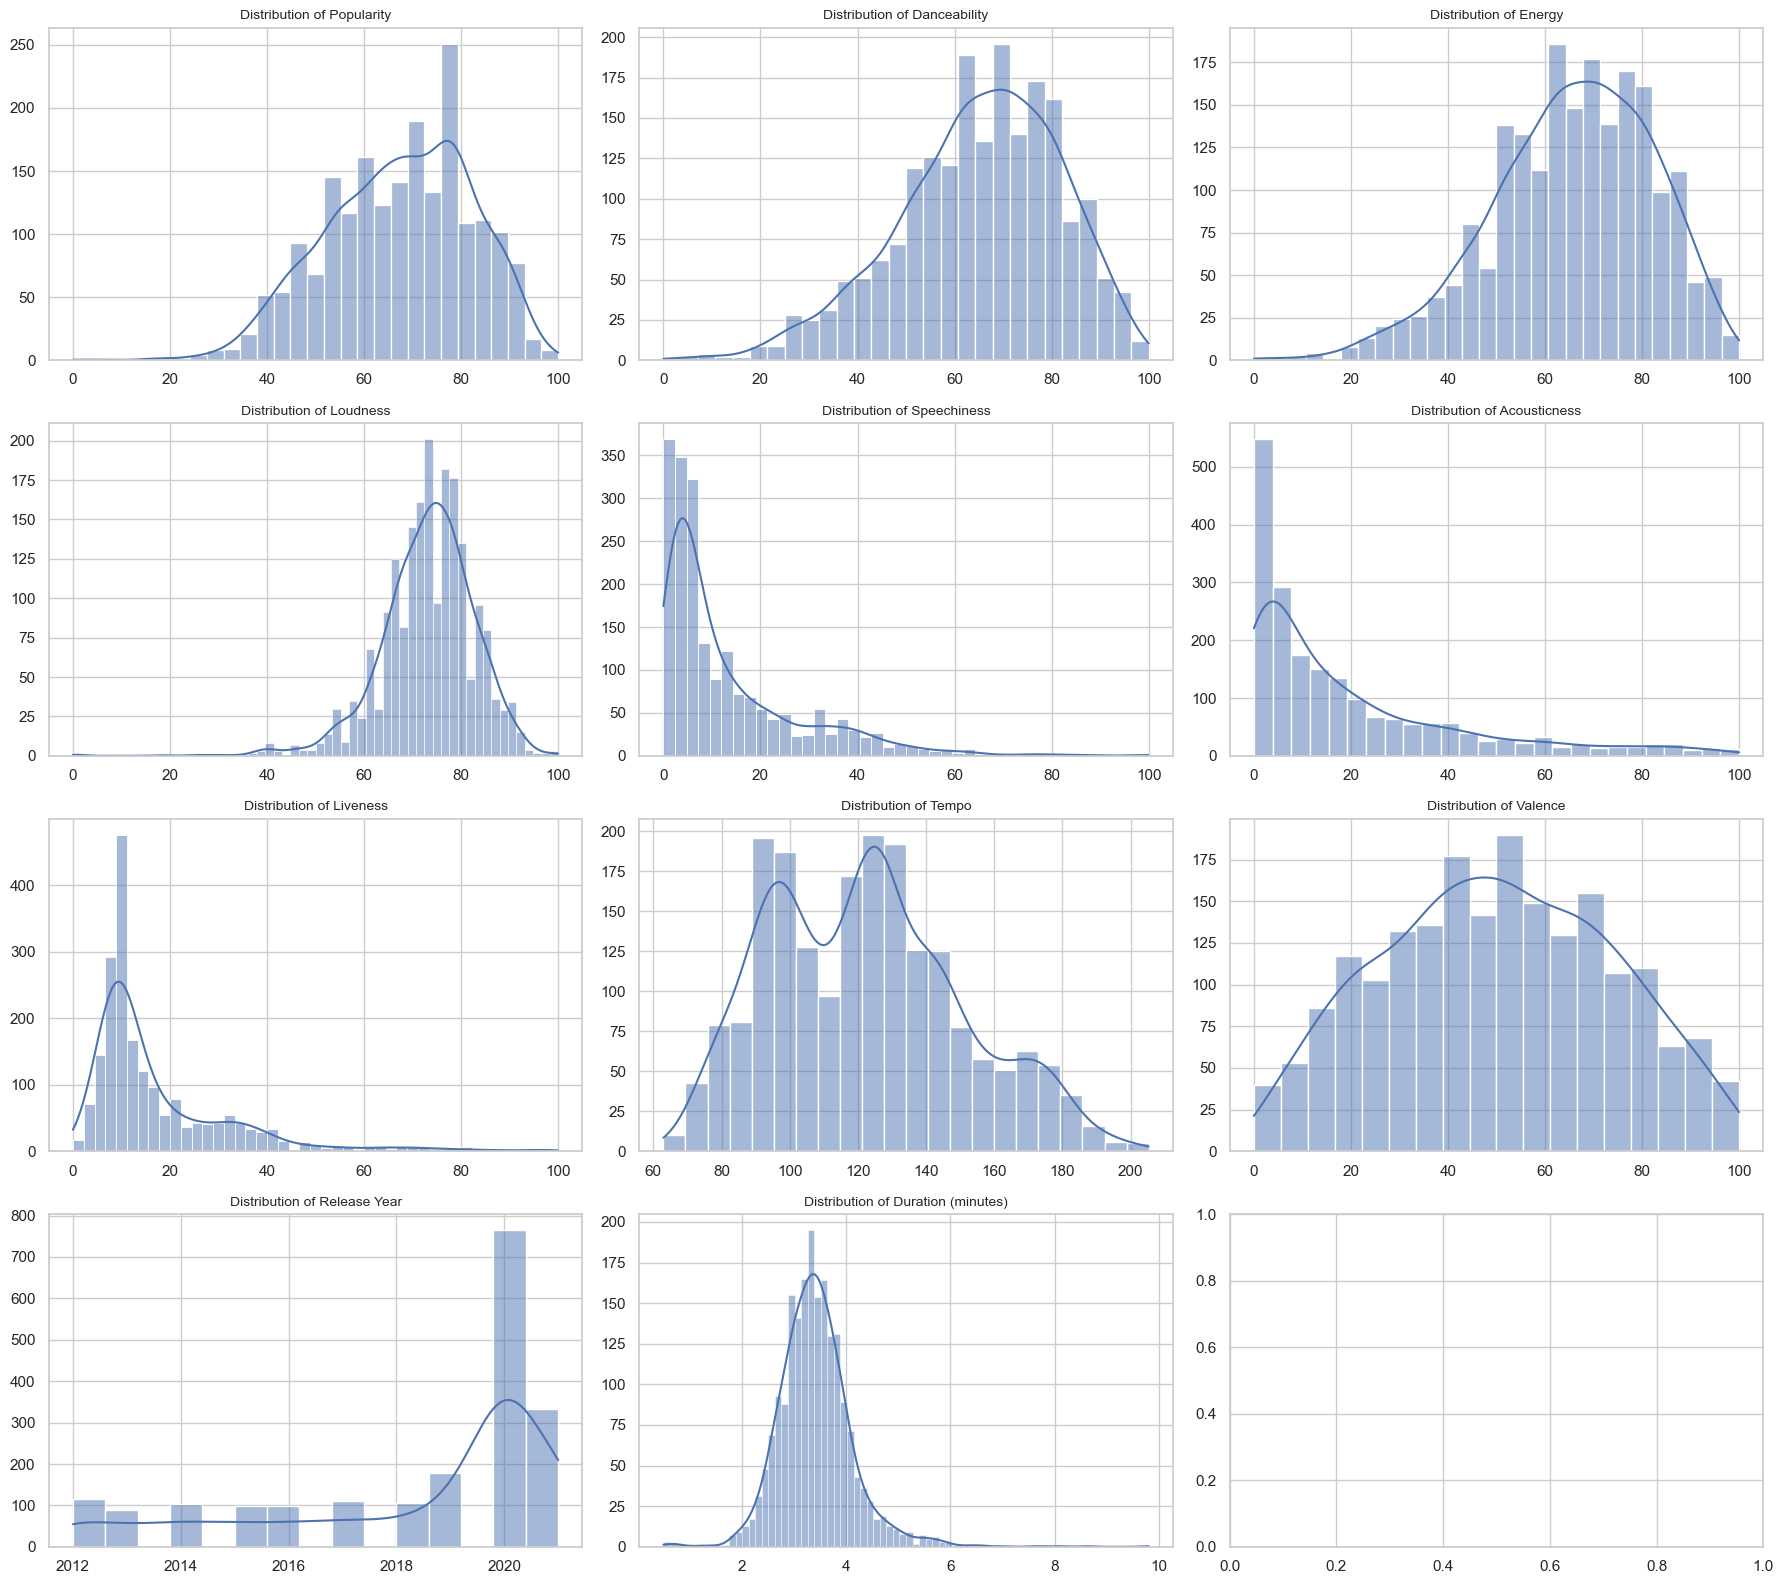

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))

# List of numerical columns for plotting
num_cols = ['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
            'Acousticness', 'Liveness', 'Tempo', 'Valence', 'Release Year', 'Duration (minutes)']

# Plot distribution of each numerical feature
for ax, col in zip(axes.flatten(), num_cols):
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()


Popularity, Danceability, Energy, Loudness, and Valence have relatively broad distributions, indicating a variety of values across songs.
Speechiness, Acousticness, and Liveness show skewed distributions, with most values clustering near lower ends, suggesting these characteristics are less pronounced in most songs.
Tempo is more evenly distributed but has a noticeable concentration in specific ranges, likely corresponding to common tempos for popular songs.
Release Year shows concentration in certain periods, possibly reflecting the dataset's focus on more recent songs or specific years with more releases.
Duration (minutes) also shows a skewed distribution with most songs falling into a typical length for pop tracks, with fewer longer or shorter outliers.

/Users/akankshapaspuleti/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


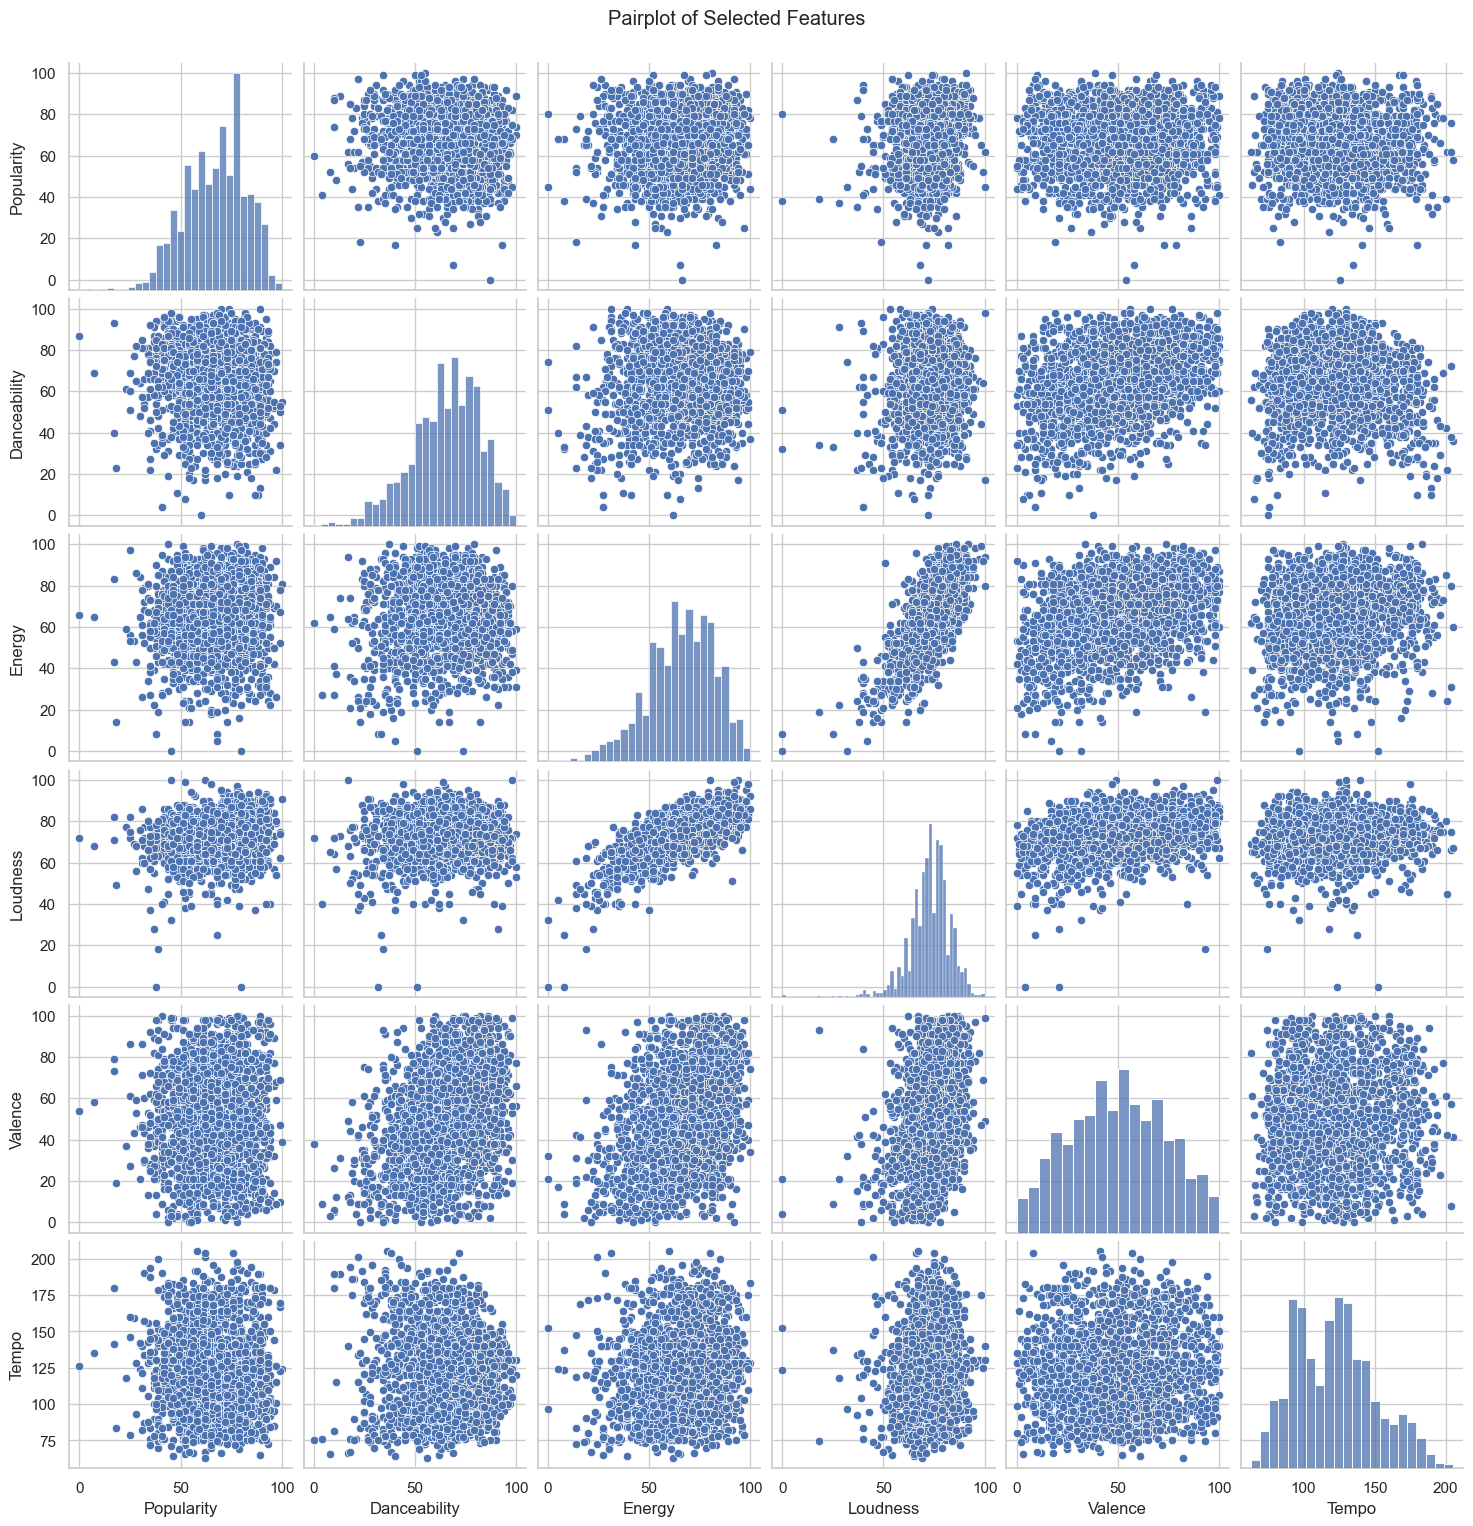

In [3]:
# Create a pairplot for selected features to see their relationships
selected_features = ['Popularity', 'Danceability', 'Energy', 'Loudness', 'Valence', 'Tempo']
sns.pairplot(data[selected_features])
plt.suptitle('Pairplot of Selected Features', y=1.02)  # Adjust title position
plt.show()



Insights from Pairplot
Popularity shows some level of relationship with features like Loudness and Energy, suggesting that louder and more energetic tracks tend to be more popular.
Danceability and Valence also show a pattern, where more danceable tracks tend to have higher valence, indicating they are generally more upbeat and positive.

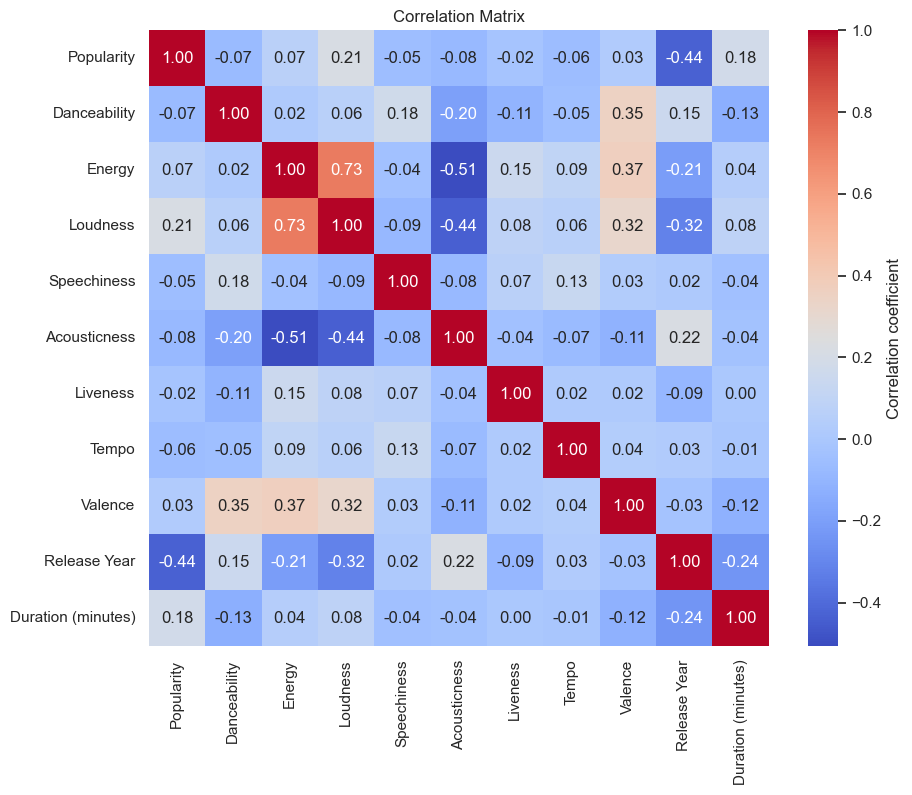

In [4]:
# Create a correlation heatmap for numerical features
correlation_matrix = data[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Matrix')
plt.show()

Insights from Correlation Heatmap
Loudness and Energy are strongly correlated, which is expected as louder songs tend to be more energetic.
Danceability shows a moderate positive correlation with Popularity, supporting the idea that more danceable tracks tend to be more popular.
Acousticness shows a negative correlation with Energy and Loudness, indicating that songs with more acoustic elements tend to be quieter and less intense.
Valence and Danceability are positively correlated, aligning with the observation that happier songs are more danceable.

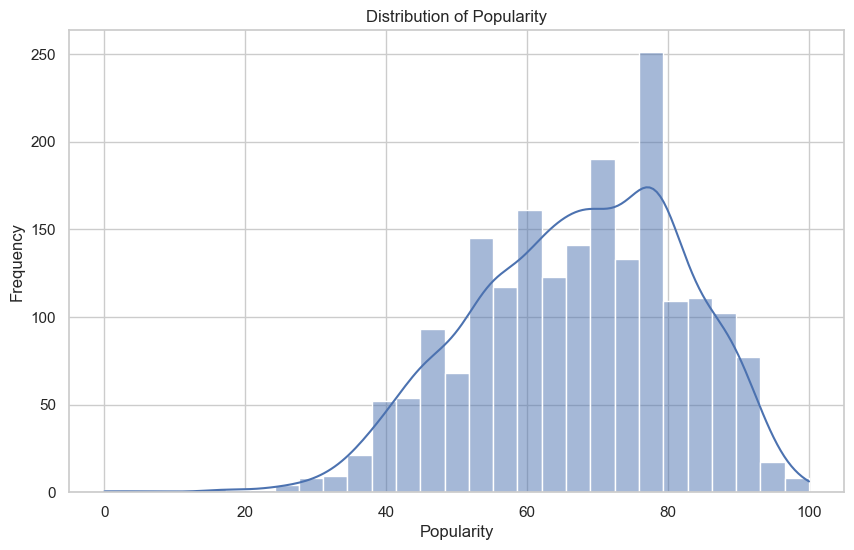

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Histogram for the 'Popularity' column
plt.figure(figsize=(10, 6))
sns.histplot(data['Popularity'], kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


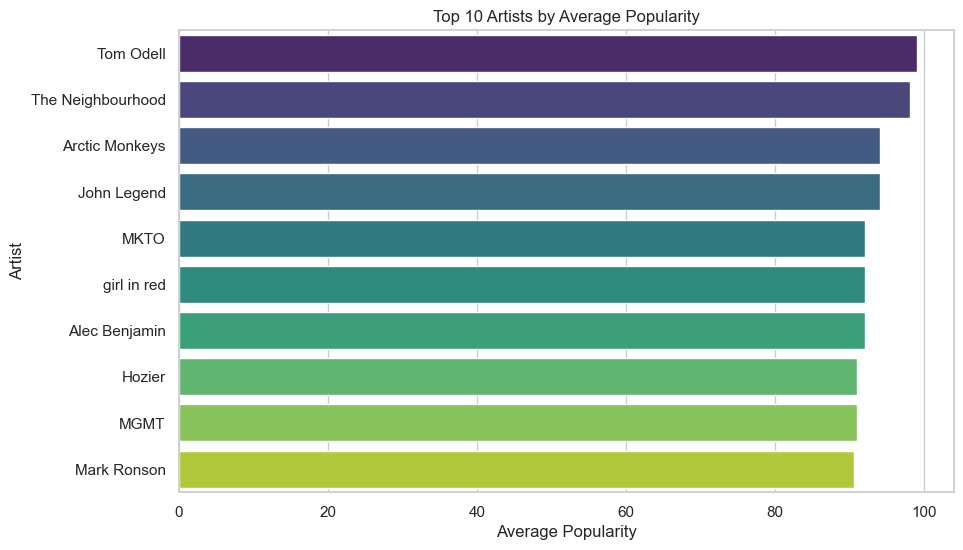

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean popularity for each artist and sort them
top_artists = data.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 10 Artists by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Artist')
plt.show()


Interpretation
Bar plot will show the top 10 artists based on average popularity. It's useful for record labels or marketers to identify which artists are currently trending or have consistently high popularity.

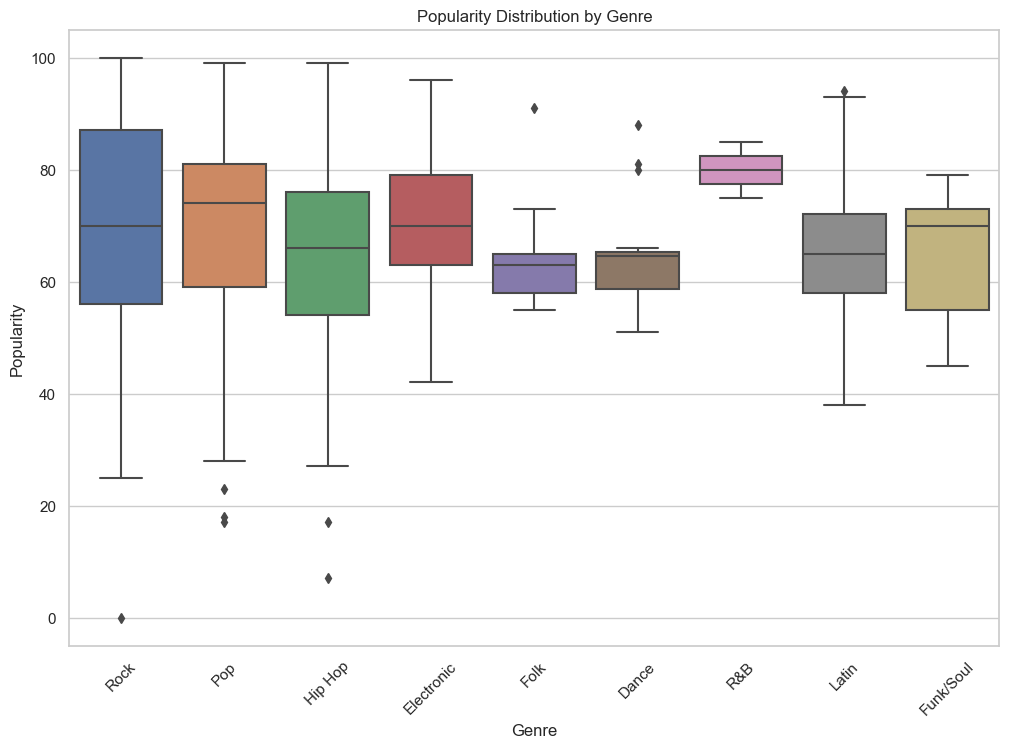

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='Popularity', data=data)
plt.xticks(rotation=45)
plt.title('Popularity Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.show()


Interpretation
Box plot This visualization helps to compare the spread and central tendency of song popularity across different genres. You can identify which genres generally have higher popularity and the variability of popularity within those genres

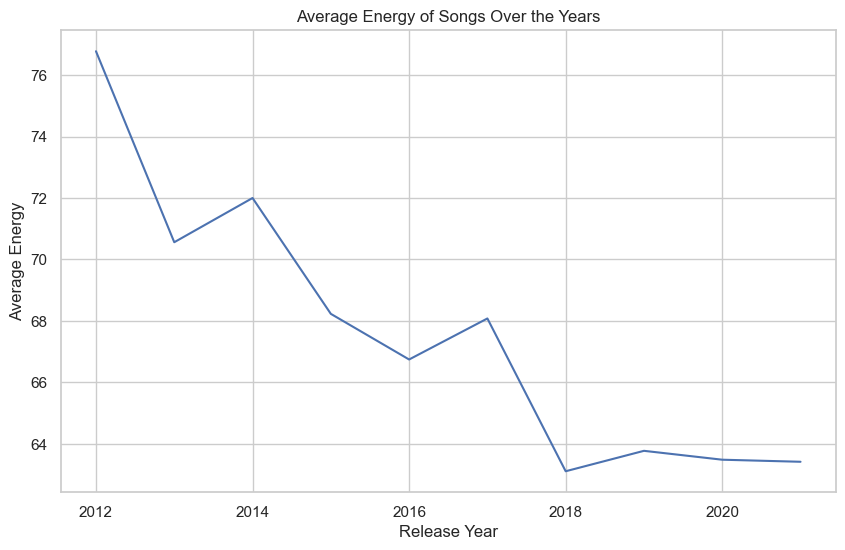

In [8]:
# Calculate mean energy for each year
average_energy_per_year = data.groupby('Release Year')['Energy'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_energy_per_year.index, y=average_energy_per_year.values)
plt.title('Average Energy of Songs Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Energy')
plt.show()


Interpretation
Line plot will display trends in the energy of songs over the years. A rising or falling trend might indicate changes in musical preferences or production techniques over time.

# Heatmap of Genre vs. Various Features
This heatmap will show how different musical features like danceability, energy, and acousticness vary across genres.

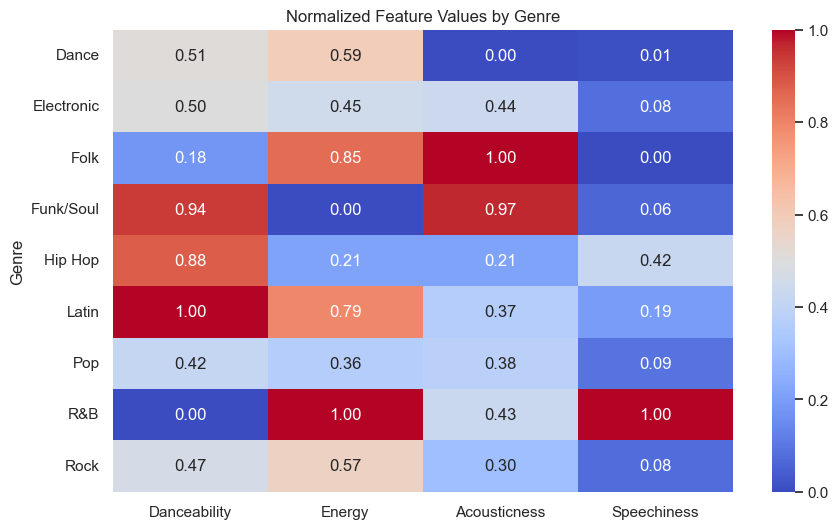

In [9]:
import numpy as np

# Calculate the mean of selected features grouped by genre
genre_features = data.groupby('Genre').agg({'Danceability': 'mean', 'Energy': 'mean', 'Acousticness': 'mean', 'Speechiness': 'mean'}).reset_index()

# Normalize the features
for col in genre_features.columns[1:]:
    genre_features[col] = (genre_features[col] - genre_features[col].min()) / (genre_features[col].max() - genre_features[col].min())

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(genre_features.set_index('Genre'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Normalized Feature Values by Genre')
plt.show()


Interpretation
This visualization helps understand which features are dominant in each genre. For example, acoustic genres might have high acousticness but low energy, helping identify genre-specific trends and characteristics.

# Scatter Plot of Tempo vs. Energy Colored by Popularity
Analyzing the relationship between tempo, energy, and how they correlate with popularity can yield insights into what makes a song successful.

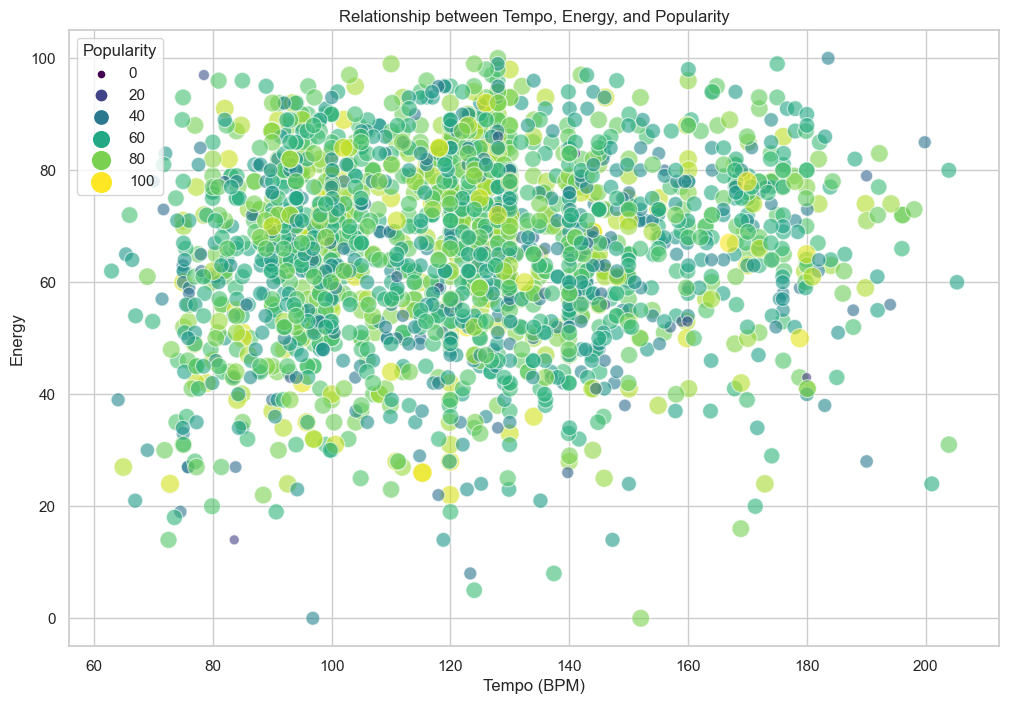

In [10]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Tempo', y='Energy', hue='Popularity', data=data, palette='viridis', size='Popularity', sizes=(20, 200), alpha=0.6)
plt.title('Relationship between Tempo, Energy, and Popularity')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Energy')
plt.show()


Interpretation
This plot can help uncover whether there's a correlation between tempo and energy and how these factors influence a song's popularity. High energy and optimal tempo might be indicative of more popular music.


# Violin Plot of Valence and Danceability by Genre
Understanding the distribution of valence and danceability across genres can provide insights into the emotional and physical appeal of songs within those genres.

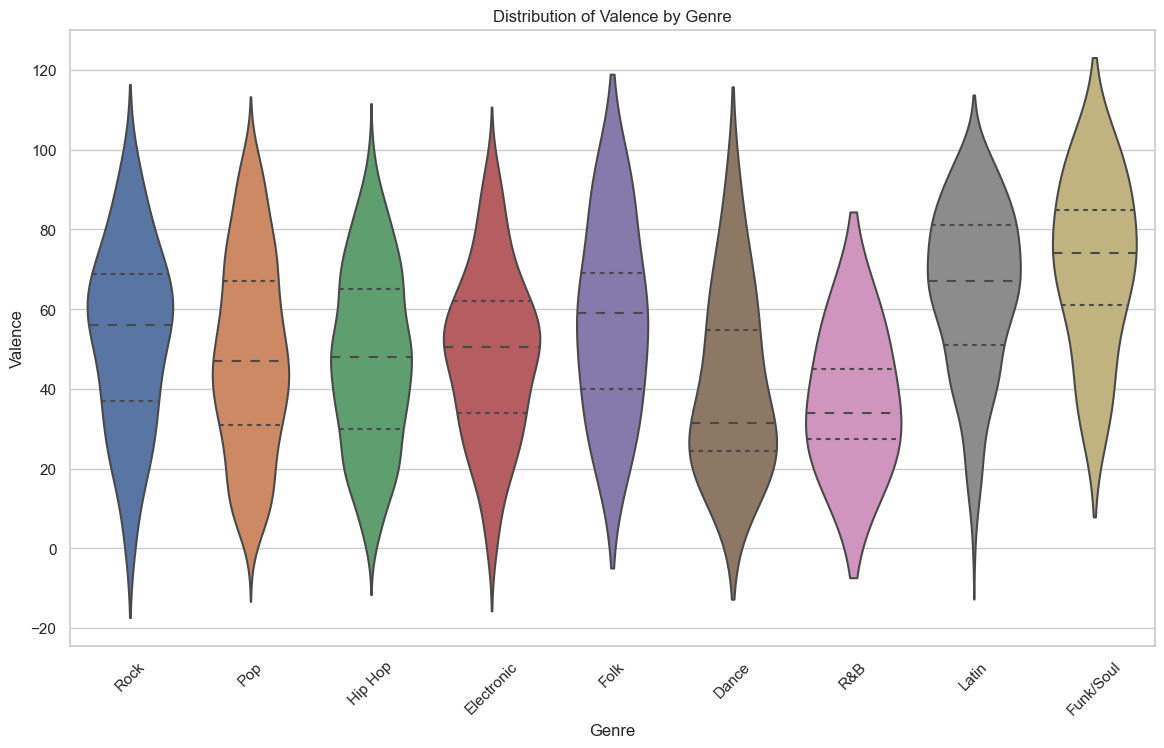

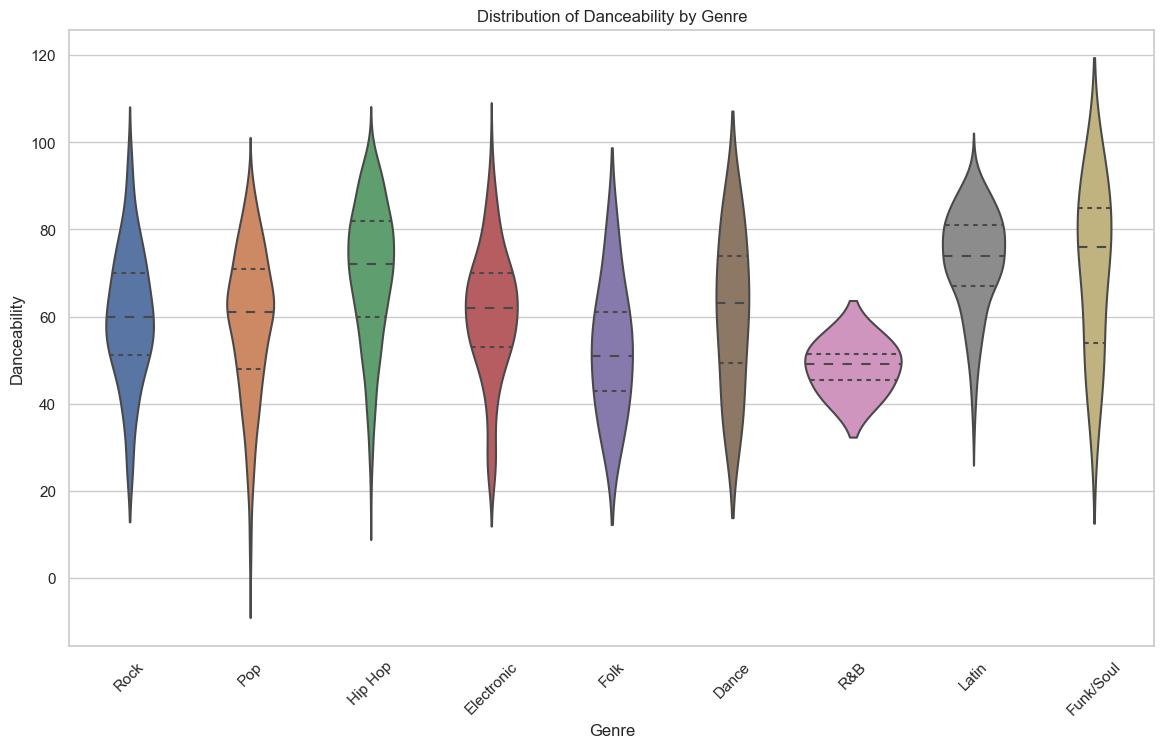

In [11]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Genre', y='Valence', data=data, inner='quartile')
plt.title('Distribution of Valence by Genre')
plt.xticks(rotation=45)
plt.ylabel('Valence')
plt.xlabel('Genre')
plt.show()

plt.figure(figsize=(14, 8))
sns.violinplot(x='Genre', y='Danceability', data=data, inner='quartile')
plt.title('Distribution of Danceability by Genre')
plt.xticks(rotation=45)
plt.ylabel('Danceability')
plt.xlabel('Genre')
plt.show()


Interpretation
These plots reveal how emotional content (valence) and danceability vary by genre, which can be crucial for targeting specific audiences or creating playlists based on mood or activity.

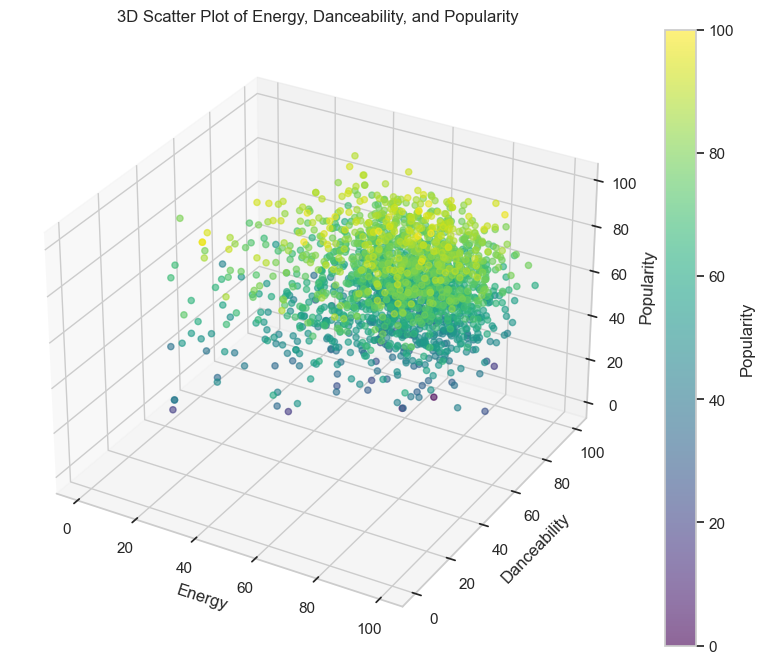

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting
sc = ax.scatter(data['Energy'], data['Danceability'], data['Popularity'], c=data['Popularity'], cmap='viridis', alpha=0.6)
plt.colorbar(sc, label='Popularity')
ax.set_xlabel('Energy')
ax.set_ylabel('Danceability')
ax.set_zlabel('Popularity')
ax.set_title('3D Scatter Plot of Energy, Danceability, and Popularity')

plt.show()



Interpretation
This cluster map will show how songs are grouped based on their musical features, revealing patterns and similarities across different songs that might not be apparent through simpler analyses.

# Time Series Analysis of Popularity Trends Over Years
Analyzing how the popularity of music trends over time can provide insights into changing listener preferences.

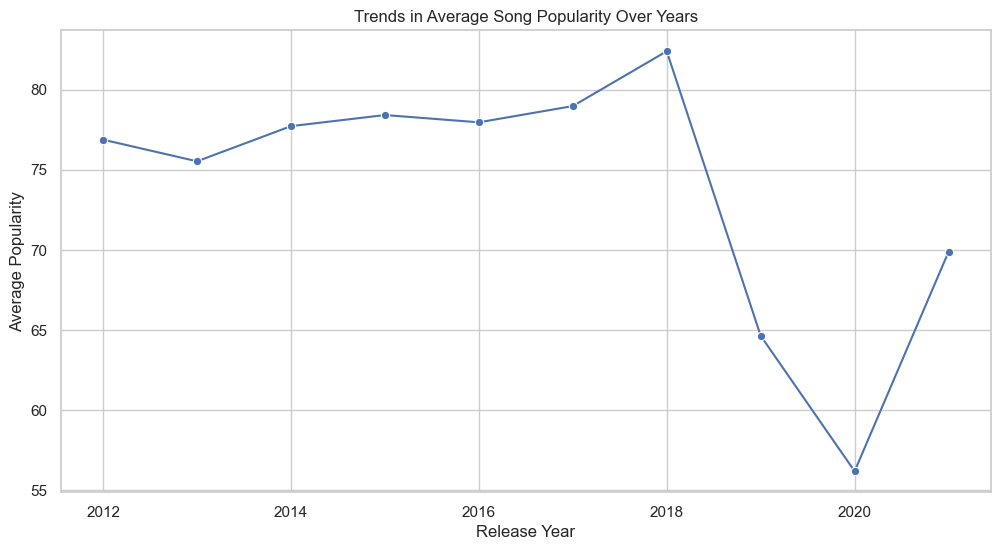

In [13]:
# Calculate average popularity by year
yearly_popularity = data.groupby('Release Year')['Popularity'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_popularity.index, y=yearly_popularity.values, marker='o')
plt.title('Trends in Average Song Popularity Over Years')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.show()


Interpretation
This time series plot of average song popularity over the years will help understand trends and shifts in music preferences over time, which could be crucial for predicting future trends and making strategic decisions in the music industry.

# Histogram of Liveness Across All Songs
This histogram will help understand the distribution of liveness across songs, indicating the presence of an audience in the recording.

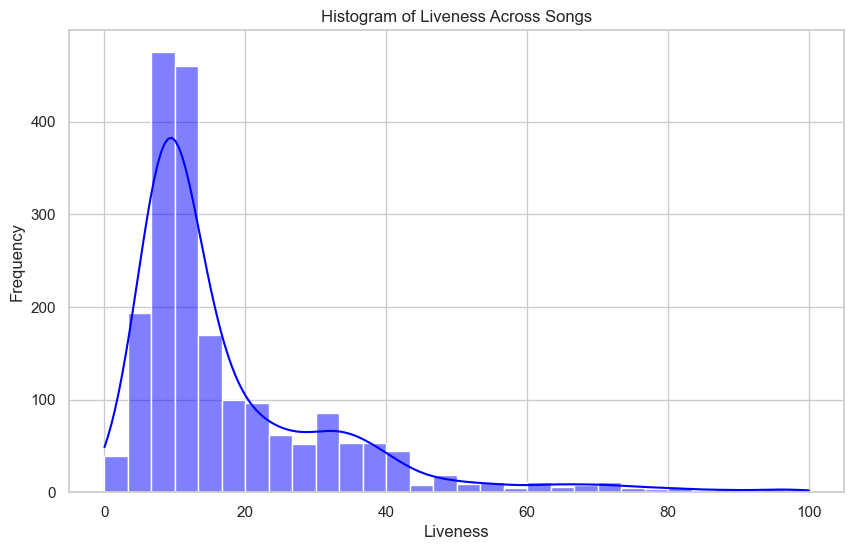

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Liveness'], bins=30, kde=True, color='blue')
plt.title('Histogram of Liveness Across Songs')
plt.xlabel('Liveness')
plt.ylabel('Frequency')
plt.show()


Insight: This histogram likely shows that most songs have a low "Liveness" score, suggesting that the majority of tracks are studio recordings with minimal audience noise or interaction. High liveness values would indicate live performances or recordings that deliberately capture audience sounds, which are less common.

# Box Plot of Loudness by Genre
This box plot will compare the loudness of songs across different genres, giving insights into production characteristics.

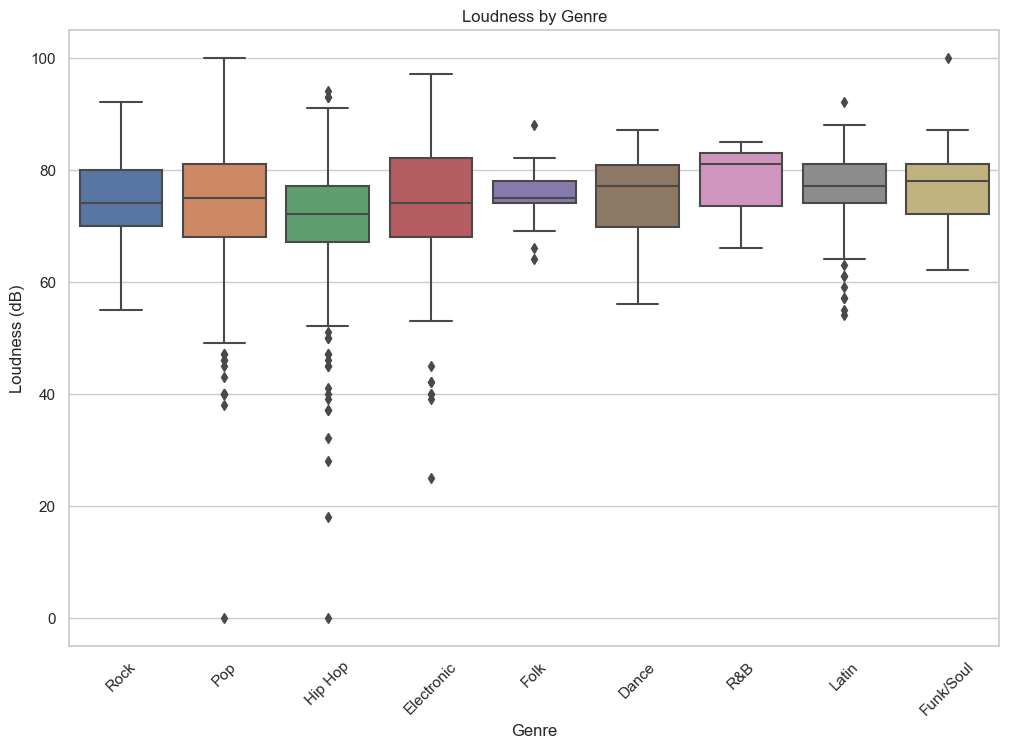

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='Loudness', data=data)
plt.xticks(rotation=45)
plt.title('Loudness by Genre')
plt.xlabel('Genre')
plt.ylabel('Loudness (dB)')
plt.show()


Insight: This visualization would reveal the range and median loudness levels across genres. Some genres, like rock or metal, might exhibit higher loudness levels due to the energetic and intense nature of the music, whereas classical or jazz might have lower average loudness. Variability within each genre can also provide insights into production diversity.


# Scatter Plot of Speechiness vs. Acousticness
Explore the relationship between speechiness and acousticness in songs, which can provide insights into song content.

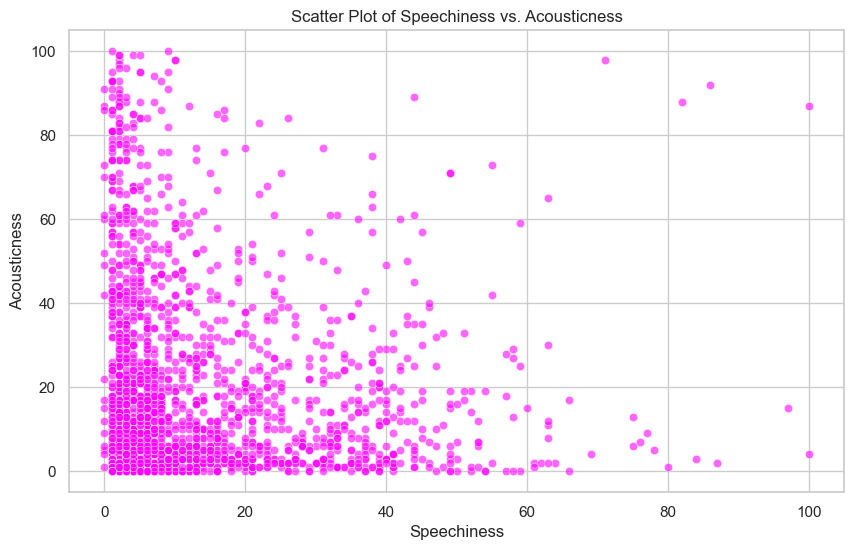

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Speechiness', y='Acousticness', data=data, color='magenta', alpha=0.6)
plt.title('Scatter Plot of Speechiness vs. Acousticness')
plt.xlabel('Speechiness')
plt.ylabel('Acousticness')
plt.show()


Insight: By plotting speechiness against acousticness, we can observe any correlation between spoken word content (speechiness) and the use of acoustic instruments. A potential insight could be that genres with higher acousticness might have lower speechiness, indicating less spoken content, typical of more traditional or classical music styles.

# Bar Chart of Average Duration by Genre
This bar chart will show the average duration of songs across different genres, which might indicate typical composition styles.

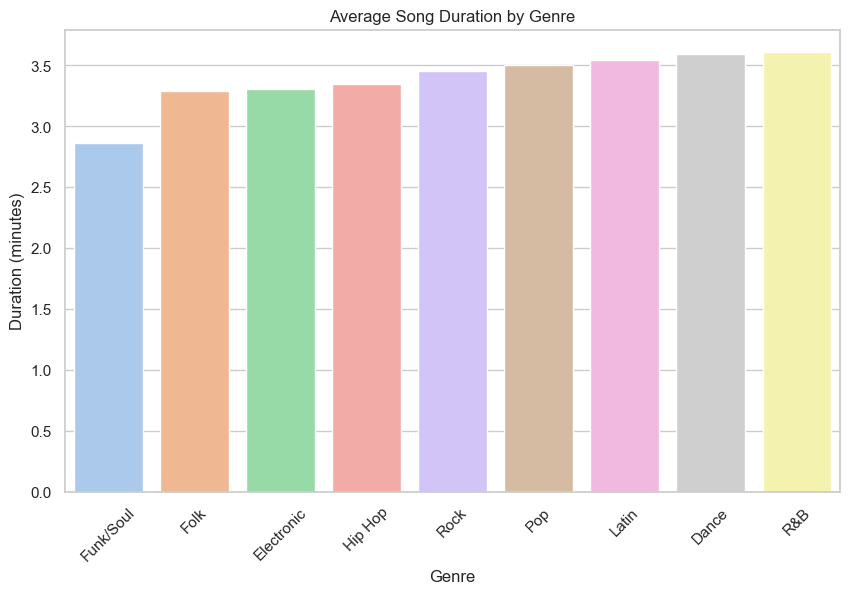

In [17]:
# Calculate the average duration per genre
average_duration = data.groupby('Genre')['Duration (minutes)'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=average_duration.index, y=average_duration.values, palette='pastel')
plt.xticks(rotation=45)
plt.title('Average Song Duration by Genre')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.show()


Insight: This chart would help identify which genres tend to have longer or shorter songs on average. For instance, progressive genres might show longer durations due to complex compositions, while pop songs might be shorter, aiming for radio play and listener retention.

# Multiple Box Plots for Various Features by Genre
Display multiple box plots for features like tempo, valence, and energy by genre in a single figure to compare their distributions across genres.

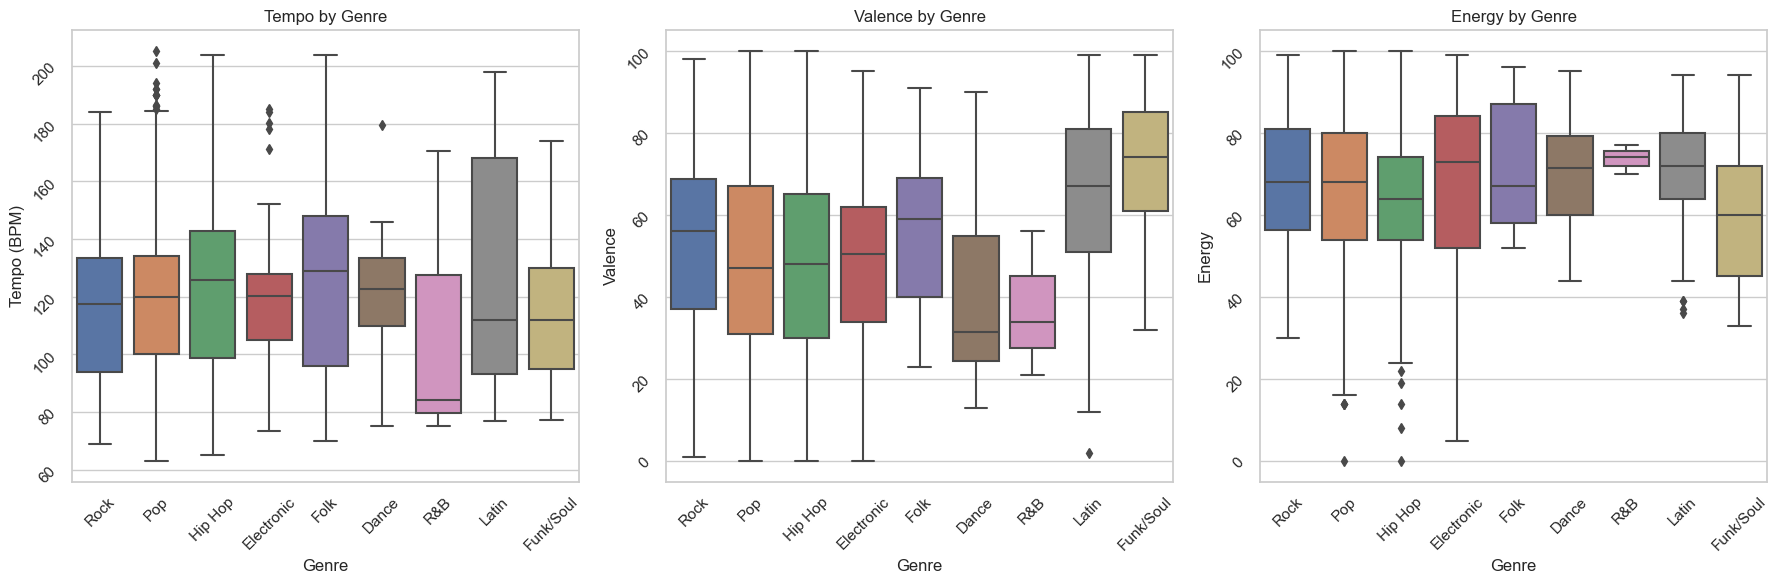

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot for Tempo by Genre
sns.boxplot(ax=axes[0], x='Genre', y='Tempo', data=data)
axes[0].set_title('Tempo by Genre')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Tempo (BPM)')
axes[0].tick_params(labelrotation=45)

# Box plot for Valence by Genre
sns.boxplot(ax=axes[1], x='Genre', y='Valence', data=data)
axes[1].set_title('Valence by Genre')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Valence')
axes[1].tick_params(labelrotation=45)

# Box plot for Energy by Genre
sns.boxplot(ax=axes[2], x='Genre', y='Energy', data=data)
axes[2].set_title('Energy by Genre')
axes[2].set_xlabel('Genre')
axes[2].set_ylabel('Energy')
axes[2].tick_params(labelrotation=45)

plt.tight_layout()
plt.show()


Tempo by Genre: This box plot will show the typical BPM (Beats Per Minute) range for each genre. Faster tempos might be common in dance and electronic music, indicating a rhythmic, upbeat style.
    
Valence by Genre: Valence measures the musical positiveness conveyed by a track. Genres like pop or dance might show higher valence, reflecting more upbeat and cheerful music, whereas blues or metal might have lower valence, indicating more somber tones.
    
Energy by Genre: This plot would indicate which genres are more dynamic and powerful. Higher energy levels are expected in genres like rock, electronic, and hip-hop, which are typically more intense and forceful.

# Interactive 3D Scatter Plot with Plotly
This visualization will allow interactive exploration of three key features: Energy, Danceability, and Popularity.

In [20]:
import plotly.express as px

# Create an interactive 3D scatter plot
fig = px.scatter_3d(data, x='Energy', y='Danceability', z='Popularity',
                    color='Popularity', size='Popularity', size_max=18,
                    title='Interactive 3D Scatter Plot of Energy, Danceability, and Popularity',
                    labels={'Energy': 'Energy', 'Danceability': 'Danceability', 'Popularity': 'Popularity'})
fig.show()


Interpretation
This interactive plot allows users to rotate, zoom, and hover over data points to get more information, making it easier to explore relationships between the variables in detail.

# Interactive Time Series Trend with Plotly
Explore the trend of average song popularity over the years with an interactive line chart.

In [21]:
# Calculate average popularity by year
yearly_popularity = data.groupby('Release Year')['Popularity'].mean().reset_index()

# Create an interactive line chart
fig = px.line(yearly_popularity, x='Release Year', y='Popularity', markers=True,
              title='Interactive Trend of Average Song Popularity Over Years')
fig.update_layout(xaxis_title='Release Year', yaxis_title='Average Popularity')
fig.show()


Interpretation
This interactive plot offers tools like zooming and hovering to provide additional context, making it a user-friendly way to observe trends over time.

# Heatmap of Song Features with Advanced Color Scaling
Visualize the correlation between various features with a heatmap that uses advanced color scaling for better clarity and visual appeal.

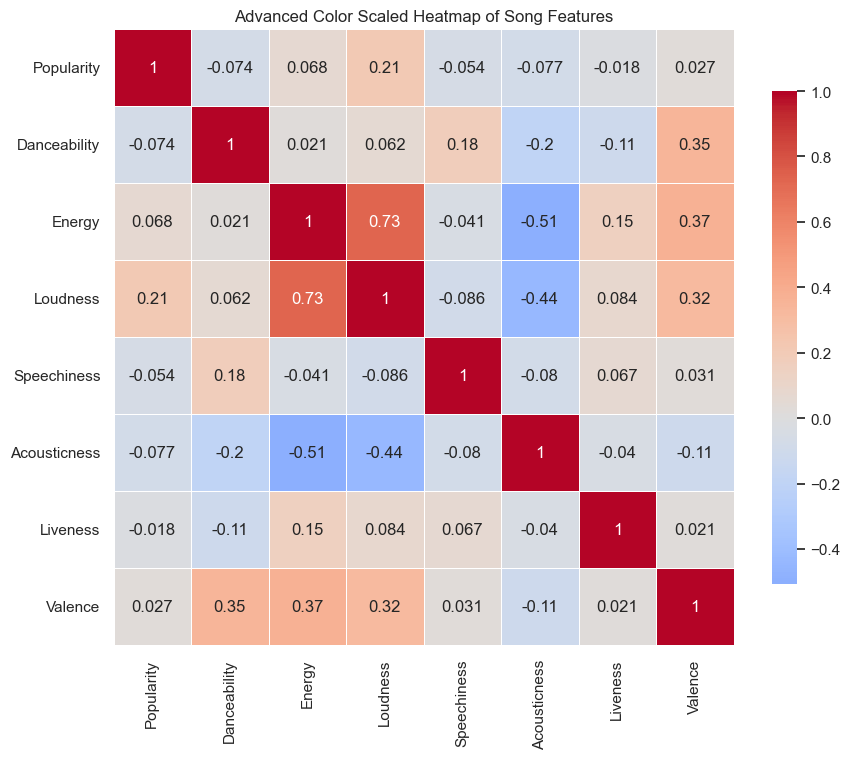

In [22]:
# Compute the correlation matrix
corr = data[['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Valence']].corr()

# Create a heatmap with advanced color scaling
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Advanced Color Scaled Heatmap of Song Features')
plt.show()



The advanced color scaling centers around zero (neutral correlation), making it easier to distinguish positive from negative correlations.